In [1]:
# LSTM (One to One Multiple Numeric Feature)
# ==========================================

%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

In [0]:
# univariate lstm example
import tensorflow as tf
import numpy as np
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard
# from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
from time import time

In [351]:
# define dataset
X1 = list()
X2 = list()
X = list()
y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]
y = [x1*x2 for x1,x2 in zip(X1,X2)]

print(X1)
print(X2)
print(y)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75]
[6, 24, 54, 96, 150, 216, 294, 384, 486, 600, 726, 864, 1014, 1176, 1350, 1536, 1734, 1944, 2166, 2400, 2646, 2904, 3174, 3456, 3750]


In [352]:
X = np.column_stack((X1, X2))
print(X)

[[ 2  3]
 [ 4  6]
 [ 6  9]
 [ 8 12]
 [10 15]
 [12 18]
 [14 21]
 [16 24]
 [18 27]
 [20 30]
 [22 33]
 [24 36]
 [26 39]
 [28 42]
 [30 45]
 [32 48]
 [34 51]
 [36 54]
 [38 57]
 [40 60]
 [42 63]
 [44 66]
 [46 69]
 [48 72]
 [50 75]]


In [353]:

print("X.shape : {}".format(X.shape))

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = np.array(X).reshape(25, 1, 2)

print("X.shape2 : {}".format(X.shape))


X.shape : (25, 2)
X.shape2 : (25, 1, 2)


In [354]:
X[:3] , X.dtype

(array([[[2, 3]],
 
        [[4, 6]],
 
        [[6, 9]]]), dtype('int64'))

In [0]:
X = tf.cast(X,tf.float32)
y = tf.cast(y,tf.float32)

In [356]:
X[:3] , y[:3]

(<tf.Tensor: id=923111, shape=(3, 1, 2), dtype=float32, numpy=
 array([[[2., 3.]],
 
        [[4., 6.]],
 
        [[6., 9.]]], dtype=float32)>,
 <tf.Tensor: id=923115, shape=(3,), dtype=float32, numpy=array([ 6., 24., 54.], dtype=float32)>)

In [0]:
# %load_ext tensorboard
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1)
# %tensorboard --logdir logs

In [0]:
# es = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=5, verbose=1, mode='max')

In [359]:
# define model

# model = Sequential()
# model.add(Bidirectional(LSTM(1000, activation='relu', input_shape=(1, 2), return_sequences=False)))
# model.add(Flatten())
# model.add(Dense(200, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# # history = model.fit(X, y, epochs=200, validation_split=0.2, batch_size=8, verbose=0)
# # history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0)
# history = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=4, verbose=0)

# model.summary()



model = Sequential()
model.add(Bidirectional(LSTM(1000, activation='relu', input_shape=(1, 2), return_sequences=False)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# history = model.fit(X, y, epochs=200, validation_split=0.2, batch_size=8, verbose=0)
# history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0)
history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

model.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_37 (Bidirectio multiple                  8024000   
_________________________________________________________________
flatten_20 (Flatten)         multiple                  0         
_________________________________________________________________
dense_145 (Dense)            multiple                  2001000   
_________________________________________________________________
dense_146 (Dense)            multiple                  1001      
Total params: 10,026,001
Trainable params: 10,026,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
# model.fit(X, y, epochs=500, validation_split=0.2, verbose=1, callbacks=[tensorboard])
# history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0, callbacks=[])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


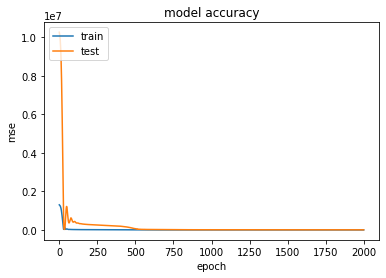

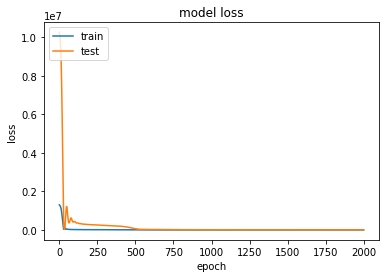

In [361]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [362]:
# demonstrate prediction
x_input = array([55, 80])
print("x_input.shape {}".format(x_input.shape))

x_input = x_input.reshape((1, 1, 2))
print("x_input.shape2 {}".format(x_input.shape))

x_input = tf.cast(x_input,tf.float32)

print("expected : ", 4400)

yhat = model.predict(x_input, verbose=0)
print("yhat : ", yhat)

x_input.shape (2,)
x_input.shape2 (1, 1, 2)
expected :  4400
yhat :  [[4163.6646]]
